In [1]:
pwd

'C:\\Users\\saicb\\Downloads\\interest_rate_prediction_linear'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt




# Given the loan details of few Customers  predict interest for the new customers

In [3]:
# Read the given csv file
ld_train = pd.read_csv("loan_data_train.csv")
ld_test = pd.read_csv("loan_data_test.csv")
ld_train

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


# Sanity Check

In [4]:
# Checking the Data shape & the data types of the coulmn in given training set
ld_train
ld_train.shape
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [5]:
# Checking the Data shape & the data types of the coulmn in given test set
ld_test
ld_test.shape
ld_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              300 non-null    int64  
 1   Amount.Requested                300 non-null    int64  
 2   Amount.Funded.By.Investors      300 non-null    object 
 3   Loan.Length                     300 non-null    object 
 4   Loan.Purpose                    300 non-null    object 
 5   Debt.To.Income.Ratio            300 non-null    object 
 6   State                           300 non-null    object 
 7   Home.Ownership                  300 non-null    object 
 8   Monthly.Income                  300 non-null    float64
 9   FICO.Range                      300 non-null    object 
 10  Open.CREDIT.Lines               300 non-null    object 
 11  Revolving.CREDIT.Balance        300 non-null    int64  
 12  Inquiries.in.the.Last.6.Months  300 

# EDA & Preprocessing

In [6]:
# Data should not have missing values
# Data should not have string column - if there are string columns convert it to numeric
#check for the outliers - plot the graph & check for the outliers, to overcome use capping(optional)
#Standardize or normalize the range of numeric column(optional)
#check for correlations & remove features which are highly correlated with each other(optional)
ld_train['Amount.Requested'].unique()
sum(ld_train['Amount.Requested']=='.')

#numeric_cols=id_all.select_dtypes(include = np.number)`
ld_test['Amount.Requested'].unique()
sum(ld_test['Amount.Requested']=='.')

0

In [7]:
ld_test['Interest.Rate']=np.nan
ld_test.head()


,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.Rate
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,NaN
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,NaN
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,NaN
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,NaN
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,NaN


In [8]:
ld_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [9]:
#Combining Train & Test Data

ld_test['Interest.Rate']=np.nan
ld_train['data'] = 'train'
ld_test['data'] = 'test'
ld_test =ld_test[ld_train.columns]
# print(ld_test.head())

ld_all=pd.concat([ld_train, ld_test],axis=0)
ld_all.shape, ld_train.shape, ld_test.shape

ld_all.head()
ld_all.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [10]:
# ID,Amount.Funded.By.Investors : drop 
# Interest Rate , Debt to income ratio : remove % and then to numeric
# Amount.Requested , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance': convert it to numeric 
# FICO.Range : replace it by a numeric column which is average of the range
# Employment Length : convert to number
# Loan Lenth, Loan Purpose , State , Home ownership: dummies for categories with good occurence rate

In [11]:
# ID,Amount.Funded.By.Investors : drop 
ld_all.drop(['ID','Amount.Funded.By.Investors'],axis=1,inplace=True)
ld_all.dtypes

Amount.Requested                   object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [12]:
#Removing the percentage symbol from Interest Rate & Debt to income ratio
ld_all['Interest.Rate']
ld_all['Debt.To.Income.Ratio']

 
for column in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[column] = ld_all[column].str.replace('%','')
    ld_all[column] = pd.to_numeric(ld_all[column],errors='coerce') ## for all the values in the column, try to convert to numerld_all.dtypes

ld_all.dtypes  

Amount.Requested                   object
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [13]:
# Amount.Requested , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance': convert it to numeric 
for col in [ 'Amount.Requested' , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    ld_all[col]=pd.to_numeric(ld_all[col],errors='coerce')
ld_all.dtypes


Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [14]:
##### Treating the FICO Range ######


k=ld_all['FICO.Range'].str.split("-",expand=True).astype(float)

ld_all['fico']=0.5*(k[0]+k[1])

del ld_all['FICO.Range']
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
fico                              float64
dtype: object

In [15]:
ld_all['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [16]:
#ld_all['Employment_Length']=ld_all['Employment_Length'].str.replace('.','10')
#ld_all['Employment_Length']=ld_all['Employment_Length'].str.replace('years','')
#ld_all['Employment_Length']=ld_all['Employment_Length'].str.replace('year','')
#ld_all['Employment_Length']=ld_all['Employment_Length'].str.replace('10+','10')
#ld_all['Employment_Length']=ld_all['Employment_Length'].str.replace('<1','0.5')

#ld_all['Employment.Length'] = pd.to_numeric(ld_all['Employment.Length'],errors = 'coerce')




In [17]:
ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('.',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('years',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('year',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('10+',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('< 1',"0.5")

ld_all['Employment.Length'] = pd.to_numeric(ld_all['Employment.Length'],errors = 'coerce')

In [18]:
ld_all.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,fico
0,25000.0,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,train,722.0
1,19750.0,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,train,712.0
2,2100.0,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,0.5,train,692.0
3,28000.0,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,NaN,train,712.0
4,24250.0,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,NaN,train,732.0


In [19]:
ld_all.dtypes
ld_all["Loan.Length"].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [20]:
#Note that to apply string function on pandas data frame columns you need to str attribute
cat_cols=ld_all.select_dtypes(['object']).columns
cat_cols

Index(['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'data'], dtype='object')

In [21]:
#label encoding - loan.length=36 will be encoded as 0, 60 as 1
ld_all.loc[ld_all['Loan.Length']=='.','Loan.Length'] = '36 months'

ld_all['loan_period'] = 0 #new col; treat all loan_periods as 36 months

ld_all.loc[ld_all['Loan.Length']=='60 months','loan_period'] = 1 #replace loan.length=60 months by 1

del ld_all['Loan.Length']

In [22]:
#ld_all['Loan.Purpose'].value_counts()
print(ld_all["Loan.Purpose"].unique())
k = pd.get_dummies(ld_all['Loan.Purpose'])

print(k.shape)
k.head()

['debt_consolidation' 'major_purchase' 'credit_card' 'small_business'
 'home_improvement' 'other' 'car' 'moving' 'house' 'educational'
 'vacation' 'wedding' 'medical' nan 'renewable_energy']
(2500, 14)


,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
ld_all.shape

del ld_all['Loan.Purpose']

ld_all = pd.concat([ld_all,k],axis=1)

In [24]:
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
data                               object
fico                              float64
loan_period                         int64
car                                 uint8
credit_card                         uint8
debt_consolidation                  uint8
educational                         uint8
home_improvement                    uint8
house                               uint8
major_purchase                      uint8
medical                             uint8
moving                              uint8
other                               uint8
renewable_energy                  

In [25]:
del ld_all['State']
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
data                               object
fico                              float64
loan_period                         int64
car                                 uint8
credit_card                         uint8
debt_consolidation                  uint8
educational                         uint8
home_improvement                    uint8
house                               uint8
major_purchase                      uint8
medical                             uint8
moving                              uint8
other                               uint8
renewable_energy                    uint8
small_business                    

In [26]:
print(ld_all['Home.Ownership'].value_counts())

ld_all.loc[ld_all['Home.Ownership'].isin(['OTHER','NONE']),'Home.Ownership'] = 'RENT'

k = pd.get_dummies(ld_all['Home.Ownership'])

del ld_all['Home.Ownership']

ld_all = pd.concat([ld_all,k],axis=1)

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64


In [27]:
ld_all.shape

(2500, 28)

In [28]:
ld_all.isnull().sum()

Amount.Requested                    5
Interest.Rate                     300
Debt.To.Income.Ratio                1
Monthly.Income                      3
Open.CREDIT.Lines                   9
Revolving.CREDIT.Balance            5
Inquiries.in.the.Last.6.Months      3
Employment.Length                 731
data                                0
fico                                0
loan_period                         0
car                                 0
credit_card                         0
debt_consolidation                  0
educational                         0
home_improvement                    0
house                               0
major_purchase                      0
medical                             0
moving                              0
other                               0
renewable_energy                    0
small_business                      0
vacation                            0
wedding                             0
MORTGAGE                            0
OWN         

In [29]:
for col in ld_all.columns:
    if (col not in ['Interest.Rate','data'])& (ld_all[col].isnull().sum()>0):
        ld_all.loc[ld_all[col].isnull(),col]=ld_all.loc[ld_all['data']=='train',col].mean()

In [30]:
ld_all.isnull().sum()

Amount.Requested                    0
Interest.Rate                     300
Debt.To.Income.Ratio                0
Monthly.Income                      0
Open.CREDIT.Lines                   0
Revolving.CREDIT.Balance            0
Inquiries.in.the.Last.6.Months      0
Employment.Length                   0
data                                0
fico                                0
loan_period                         0
car                                 0
credit_card                         0
debt_consolidation                  0
educational                         0
home_improvement                    0
house                               0
major_purchase                      0
medical                             0
moving                              0
other                               0
renewable_energy                    0
small_business                      0
vacation                            0
wedding                             0
MORTGAGE                            0
OWN         

In [31]:
ld_train=ld_all[ld_all['data']=='train']
del ld_train['data']
ld_test=ld_all[ld_all['data']=='test']
ld_test.drop(['Interest.Rate','data'],axis=1,inplace=True)

C:\Users\saicb\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
numeric_data = ld_train[['Amount.Requested', 'Interest.Rate','Debt.To.Income.Ratio',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance']]
numeric_data.head()

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Open.CREDIT.Lines,Revolving.CREDIT.Balance
0,25000.0,18.49,27.56,11.0,15210.0
1,19750.0,17.27,13.39,14.0,19070.0
2,2100.0,14.33,3.50,13.0,893.0
3,28000.0,16.29,19.62,12.0,38194.0
4,24250.0,12.23,23.79,6.0,31061.0


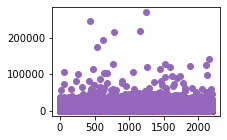

In [33]:
indexes = list(numeric_data.index)
plt.figure(figsize = (3,2))
for cols in numeric_data:
  plt.scatter(x = indexes,y = numeric_data[cols])

In [34]:
del ld_all

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
ld_train1,ld_train2=train_test_split(ld_train,test_size=0.2,random_state=2)

In [37]:
# Notice that only train data is used for imputing missing values in both train and test 

x_train1=ld_train1.drop('Interest.Rate',axis=1)
y_train1=ld_train1['Interest.Rate']

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(x_train1,y_train1)

LinearRegression()

In [41]:
x_train1.shape

(1760, 26)

In [42]:
lm.intercept_

76.79567820315464

In [43]:
list(zip(x_train1.columns,lm.coef_))

[('Amount.Requested', 0.00015673880086880618),
 ('Debt.To.Income.Ratio', -0.002504982742051878),
 ('Monthly.Income', -2.568801938990042e-05),
 ('Open.CREDIT.Lines', -0.03982888557695672),
 ('Revolving.CREDIT.Balance', -3.7988069148814926e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3254546481584737),
 ('Employment.Length', -0.0011139191932678938),
 ('fico', -0.08691227530878744),
 ('loan_period', 3.156284619213706),
 ('car', -1.1973217213338094),
 ('credit_card', -1.8072419440642526),
 ('debt_consolidation', -1.6415785862232817),
 ('educational', -1.0025217124154473),
 ('home_improvement', -1.533525711726572),
 ('house', -0.9320664205734587),
 ('major_purchase', -1.3544218541110433),
 ('medical', -1.599205590440272),
 ('moving', 0.10770210110564281),
 ('other', -0.755138930306778),
 ('renewable_energy', -1.2080179286946007),
 ('small_business', -1.157845003952749),
 ('vacation', -1.4775736200703435),
 ('wedding', -1.989235492147191),
 ('MORTGAGE', -3.064216150346139),
 ('OWN', -2.656599

In [44]:
list(zip(x_train1.columns,lm.coef_))

[('Amount.Requested', 0.00015673880086880618),
 ('Debt.To.Income.Ratio', -0.002504982742051878),
 ('Monthly.Income', -2.568801938990042e-05),
 ('Open.CREDIT.Lines', -0.03982888557695672),
 ('Revolving.CREDIT.Balance', -3.7988069148814926e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3254546481584737),
 ('Employment.Length', -0.0011139191932678938),
 ('fico', -0.08691227530878744),
 ('loan_period', 3.156284619213706),
 ('car', -1.1973217213338094),
 ('credit_card', -1.8072419440642526),
 ('debt_consolidation', -1.6415785862232817),
 ('educational', -1.0025217124154473),
 ('home_improvement', -1.533525711726572),
 ('house', -0.9320664205734587),
 ('major_purchase', -1.3544218541110433),
 ('medical', -1.599205590440272),
 ('moving', 0.10770210110564281),
 ('other', -0.755138930306778),
 ('renewable_energy', -1.2080179286946007),
 ('small_business', -1.157845003952749),
 ('vacation', -1.4775736200703435),
 ('wedding', -1.989235492147191),
 ('MORTGAGE', -3.064216150346139),
 ('OWN', -2.656599

In [45]:
x_train2=ld_train2.drop('Interest.Rate',axis=1)

In [46]:
predicted_ir=lm.predict(x_train2)

err_df = pd.DataFrame(ld_train2['Interest.Rate'])
err_df["Pred"] = predicted_ir

err_df["Err"] = abs(err_df["Pred"] - err_df["Interest.Rate"])
print(f"avg error = {err_df['Err'].mean()}")
err_df.head()


avg error = 1.6137580872453776


,Interest.Rate,Pred,Err
2121,18.79,18.943527,0.153527
960,18.49,15.776127,2.713873
952,7.49,9.795592,2.305592
1958,9.91,11.202996,1.292996
681,18.25,15.942980,2.307020


In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(ld_train2['Interest.Rate'],predicted_ir)

1.6137580872453778

In [49]:
x_train=ld_train.drop('Interest.Rate',axis=1)
y_train=ld_train['Interest.Rate']

In [50]:
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
test_pred=lm.predict(ld_test)

In [52]:
test_pred

array([16.76569243, 15.88332555, 10.31401325,  3.68733227, 15.32171584,
        7.12003823, 15.91460744, 10.74031718, 15.84603579, 12.20003786,
        9.72130518, 14.91173167, 11.72915982, 13.70637129, 13.62240921,
       18.3575554 , 10.50635428, 15.77031502, 13.8010982 , 14.07317086,
       22.24959158, 17.86113146, 12.29238366, 14.89098412,  9.630536  ,
       10.6624372 , 12.98733686, 19.57305117, 12.37121474, 16.476947  ,
       15.2465869 , 15.2270354 , 12.45607176, 15.00190231, 13.65393143,
       14.23224154, 19.40179907, 10.79105972, 11.45330155, 16.37912565,
       14.12958388, 11.28454404, 14.65381913, 13.08975595, 15.96123696,
       16.87722065, 15.23860786, 16.61350227, 16.95407135, 10.52731517,
       13.76213568, 19.80541616,  9.47612806, 19.66349835, 15.73872256,
       14.84512264, 17.90176028, 14.86096207, 10.87794866, 14.8253772 ,
       13.36212098, 17.05118033,  8.77901264, 14.44030503, 10.03192286,
       11.37715164, 12.84644214, 14.97760189, 11.61591516, 14.53

In [53]:
pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)